In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
df=pd.read_csv('bank-marketing.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df = pd.get_dummies(df,columns=['job'],drop_first=True)
df.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,married,basic.4y,no,no,no,telephone,may,mon,261,...,False,True,False,False,False,False,False,False,False,False
1,57,married,high.school,unknown,no,no,telephone,may,mon,149,...,False,False,False,False,False,True,False,False,False,False
2,37,married,high.school,no,yes,no,telephone,may,mon,226,...,False,False,False,False,False,True,False,False,False,False
3,40,married,basic.6y,no,no,no,telephone,may,mon,151,...,False,False,False,False,False,False,False,False,False,False
4,56,married,high.school,no,no,yes,telephone,may,mon,307,...,False,False,False,False,False,True,False,False,False,False


In [7]:
df['default'] = df['default'].map({'no':0,'yes':1,'unknown':0})
df['y'] = df['y'].map({'no':0,'yes':1})

In [8]:
# Split the data into features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = model.predict(X_test)

In [11]:


print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))
print("\nClassification Report:\n",metrics.classification_report(y_test,y_pred))


Accuracy: 0.910536537994659
Precision: 0.6308411214953271
Recall: 0.44751381215469616
F1_Score: 0.5235940530058177

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7333
           1       0.63      0.45      0.52       905

    accuracy                           0.91      8238
   macro avg       0.78      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238



Confusion Matrix:


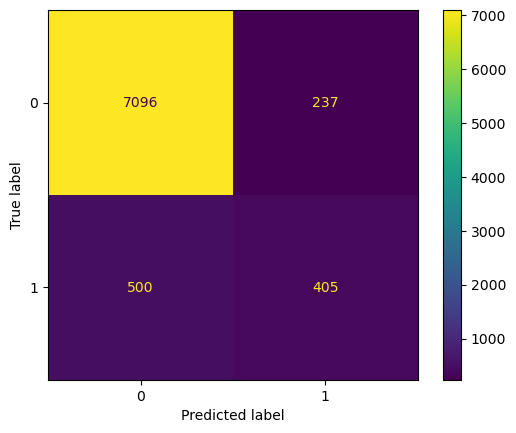

In [12]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [13]:
from sklearn.tree import plot_tree

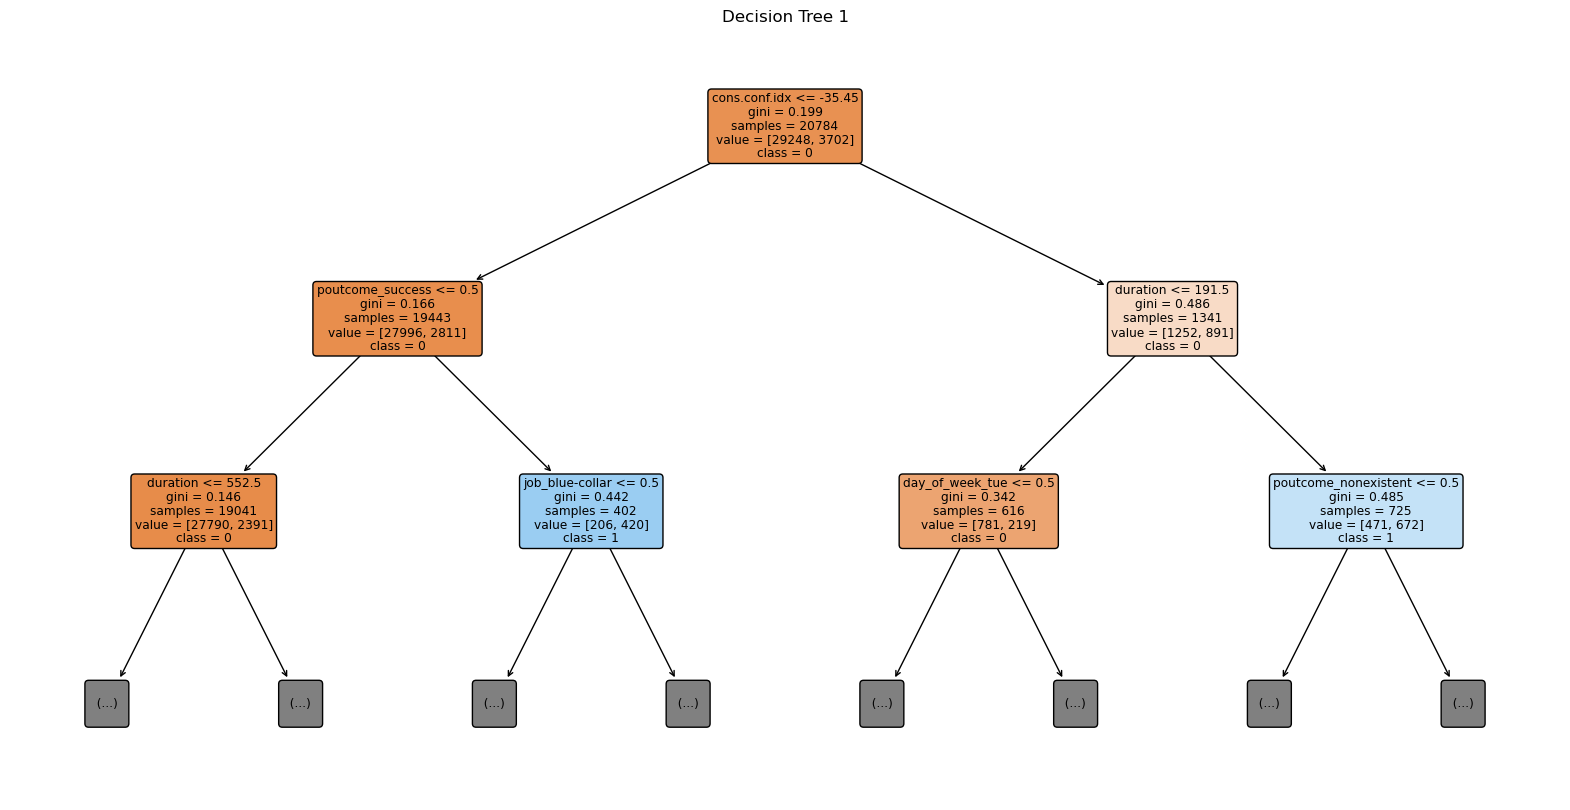

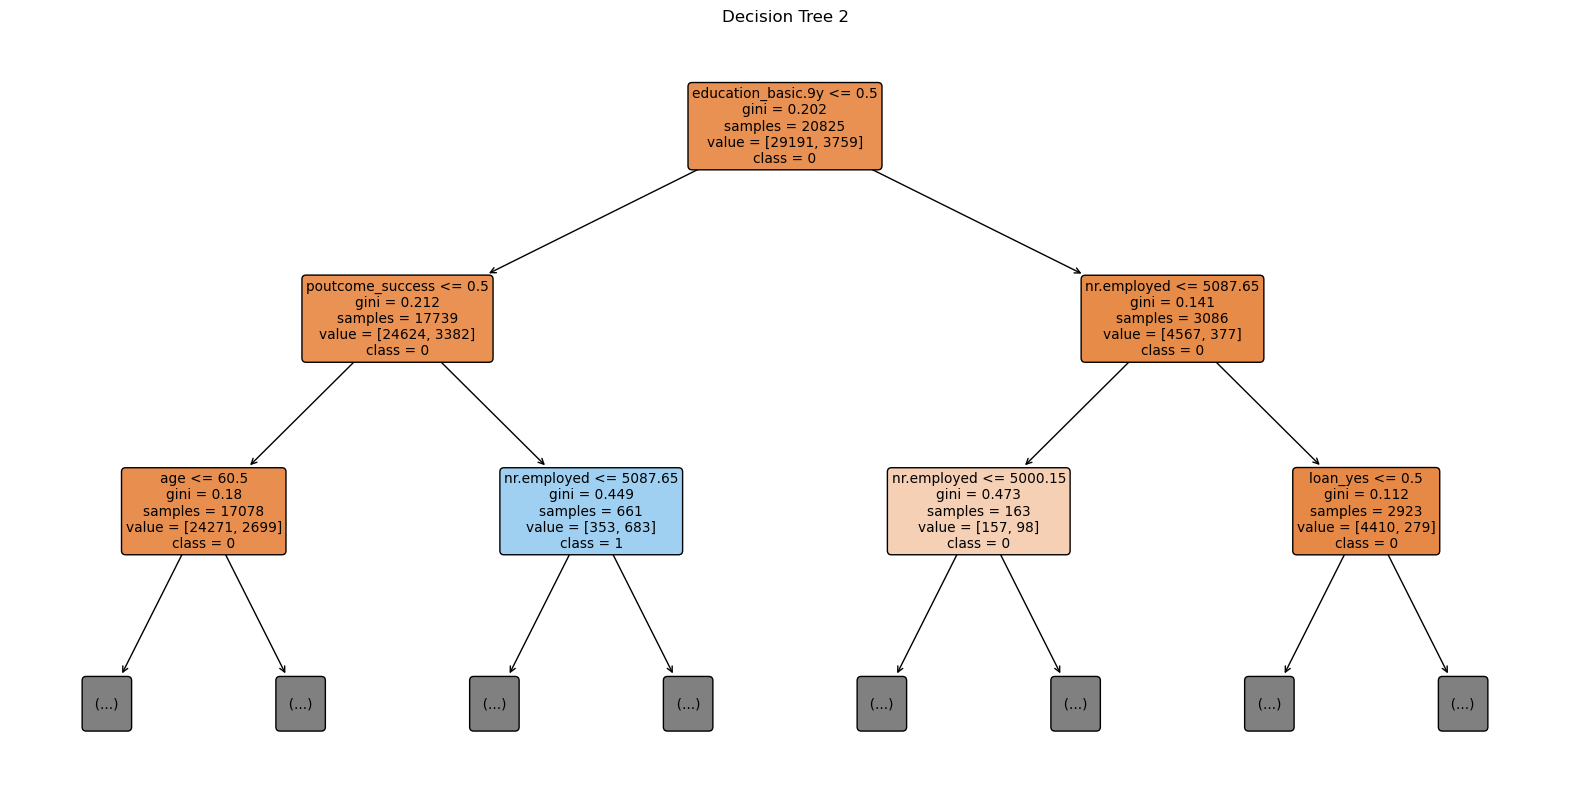

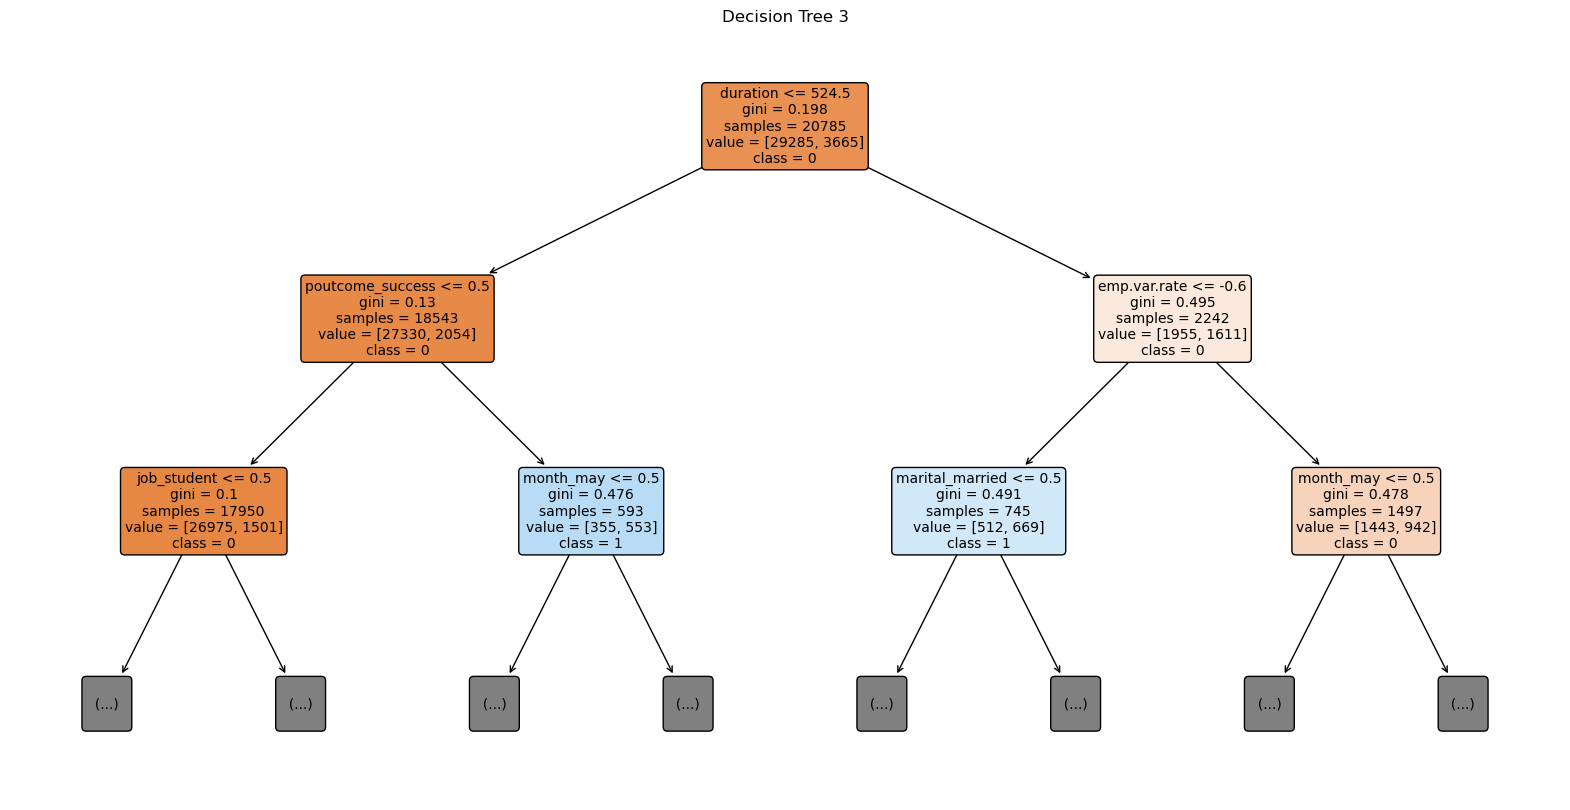

In [14]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(20, 10))
    plot_tree(
        model.estimators_[i],
        feature_names=X_train.columns.tolist(),   # convert Index to list
        class_names=['0', '1'],
        filled=True,
        rounded=True,
        max_depth=2
    )
    plt.title(f"Decision Tree {i+1}")
    plt.show()


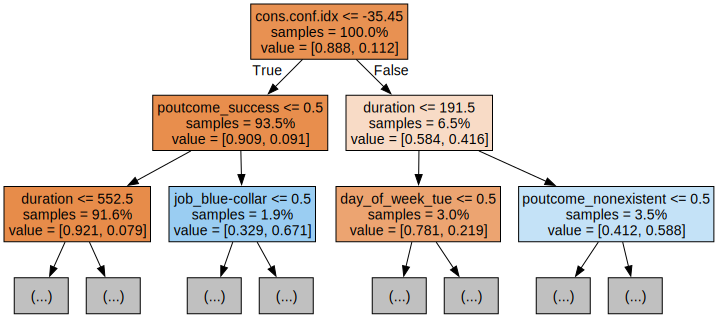

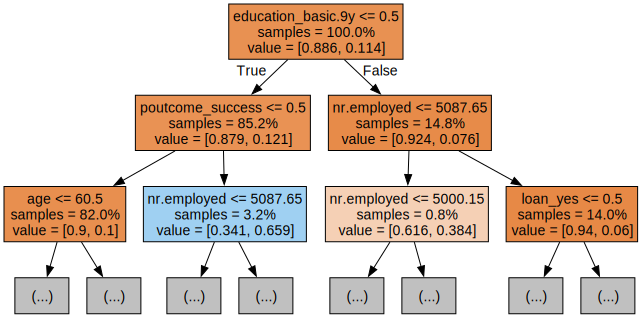

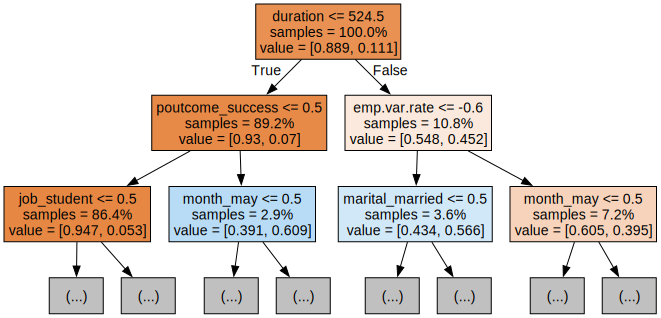

In [16]:
for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)